In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/covid_data/CovidFaelle_Altersgruppe.csv', delimiter=';')

In [141]:
df.drop(columns=['BundeslandID', 'Anzahl', 'AnzahlGeheilt'], inplace=True)

In [142]:
df_barchart = df[((df['Bundesland'] == 'Niederösterreich') | (df['Bundesland'] == 'Wien')) & (df['Time'] == '10.11.2022 00:00:00')]

In [144]:
df_barchart.sort_values('AltersgruppeID', inplace=True)
#new_row = df_barchart[(df_barchart['Altersgruppe'] == '<5') | (df_barchart['Altersgruppe'] == '5-14') | (df_barchart['Altersgruppe'] == '15-24') | (df_barchart['Altersgruppe'] == '25-34') | (df_barchart['Altersgruppe'] == '35-44') | (df_barchart['Altersgruppe'] == '45-54') | (df_barchart['Altersgruppe'] == '55-64')].aggregate('sum')
#df_barchart = df_barchart.tail(df_barchart.shape[0] - 7)
#df_barchart = df_barchart.append(new_row, ignore_index=True)
#df_barchart.at[3, 'Altersgruppe'] = '<65'
#df_barchart.at[3, 'AltersgruppeID'] = 1
#df_barchart.sort_values('AltersgruppeID', inplace=True)
#df_barchart['Proportion of death/100'] = (df_barchart['AnzahlTot'] / df_barchart['AnzEinwohner']) * 100


C:\Users\angel\AppData\Local\Temp\ipykernel_20288\4160867413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart.sort_values('AltersgruppeID', inplace=True)


In [145]:
df_barchart['Altersgruppe'].replace(['<5', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64'], ['<65', '<65', '<65', '<65', '<65', '<65', '<65'], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_20288\4189469903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart['Altersgruppe'].replace(['<5', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64'], ['<65', '<65', '<65', '<65', '<65', '<65', '<65'], inplace=True)


In [147]:
df_barchart.drop(columns=['AltersgruppeID', 'Time'], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_20288\922317065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barchart.drop(columns=['AltersgruppeID', 'Time'], inplace=True)


In [148]:
df_barchart = df_barchart.groupby(['Altersgruppe', 'Bundesland', 'Geschlecht'], as_index = False, sort=False)[['AnzEinwohner','AnzahlTot']].sum()

In [151]:
df_barchart['Proportion of death/100'] = (df_barchart['AnzahlTot'] / df_barchart['AnzEinwohner']) * 100

In [153]:
df_barchart.head(16)

,Altersgruppe,Bundesland,Geschlecht,AnzEinwohner,AnzahlTot,Proportion of death/100
0,<65,Niederösterreich,M,678752,294,0.043315
1,<65,Niederösterreich,W,665588,139,0.020884
2,<65,Wien,M,805612,307,0.038108
3,<65,Wien,W,797712,152,0.019054
4,65-74,Niederösterreich,M,81990,430,0.524454
5,65-74,Niederösterreich,W,91063,209,0.229511
6,65-74,Wien,M,71617,441,0.615776
7,65-74,Wien,W,88891,298,0.335242
8,75-84,Wien,M,49135,812,1.652590
9,75-84,Niederösterreich,M,56332,792,1.405950


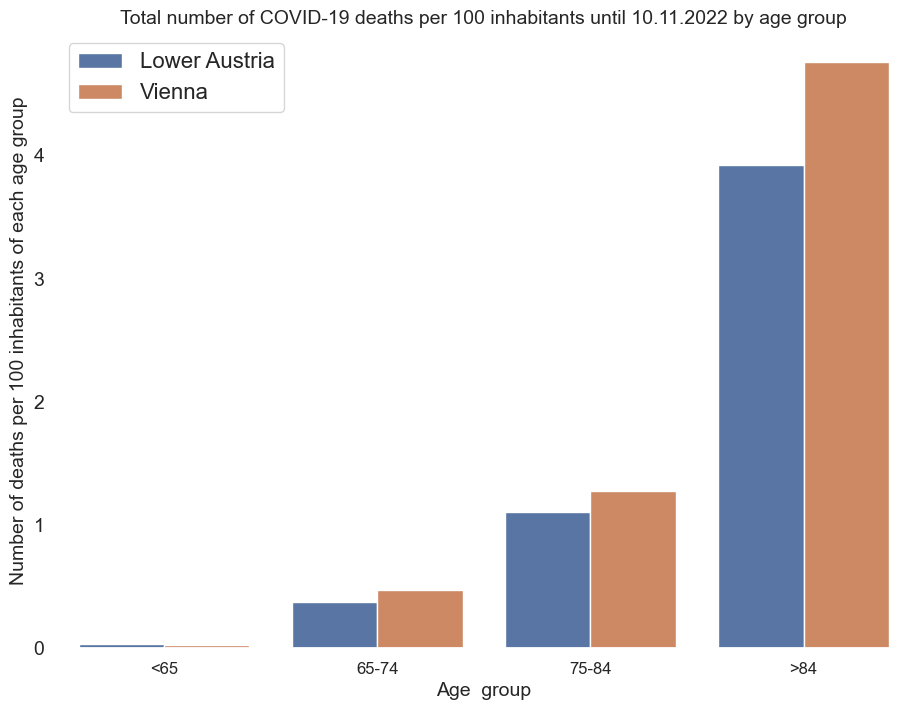

In [169]:
sns.set(rc = {'figure.figsize':(11,8)})
ax = sns.barplot(data=df_barchart, x='Altersgruppe', y='Proportion of death/100', hue='Bundesland', errorbar=None)
ax.set_facecolor('white')
plt.xlabel('Age  group', fontsize=14)
plt.ylabel('Number of deaths per 100 inhabitants of each age group', fontsize=14)
plt.title('Total number of COVID-19 deaths per 100 inhabitants until 10.11.2022 by age group', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc = 'upper left', fontsize=16, facecolor='white', labels=['Lower Austria', 'Vienna'])
leg = plt.legend
#plt.savefig('figure1.png', dpi=600, format='png', bbox_inches='tight')
plt.show()